In [135]:
!gdown 1i49zzrvpqQ1KUODnMbuF87XgPTIiIydl
!gdown 11JyElz92JJcJSMuH9naowMULwM1VqLQo

Downloading...
From: https://drive.google.com/uc?id=1i49zzrvpqQ1KUODnMbuF87XgPTIiIydl
To: /content/test.csv
100% 451k/451k [00:00<00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id=11JyElz92JJcJSMuH9naowMULwM1VqLQo
To: /content/train.csv
100% 461k/461k [00:00<00:00, 79.4MB/s]


In [136]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import MEstimateEncoder


# Read the data
X = pd.read_csv('train.csv', index_col='Id') 
X_test = pd.read_csv('test.csv', index_col='Id')

y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# X.dropna(axis=1, inplace=True)

In [138]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


In [139]:
X_train=X
lst_train = X_train.columns
lst_test = X_test.columns
drop_lst = list(set(lst_train)-set(lst_test))
X_train = X_train.drop(X_train[drop_lst],axis=1)

In [140]:
lst_train = X_train.columns
lst_test = X_test.columns
drop_lst = list(set(lst_test)-set(lst_train))
X_test = X_test.drop(X_test[drop_lst],axis=1)

In [141]:
X_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [142]:
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

In [104]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Neighborhood', 'Exterior2nd', 'Exterior1st']


In [143]:
from sklearn.preprocessing import OneHotEncoder

X_train = X_train.drop(X_train[high_cardinality_cols],axis=1)
X_test = X_test.drop(X_test[high_cardinality_cols],axis=1)

one_hot = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_col_train = pd.DataFrame(one_hot.fit_transform(X_train[low_cardinality_cols]))
OH_col_test = pd.DataFrame(one_hot.transform(X_test[low_cardinality_cols]))

OH_col_train.index = X_train.index
OH_col_test.index = X_test.index

num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_test = X_test.drop(low_cardinality_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_col_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_col_test], axis=1)

In [144]:
OH_X_train.columns == OH_X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
# cols = [col for col in OH_X_train.columns if OH_X_train[col].isnull().any()]
# OH_X_train.drop(cols,axis=1,inplace=True)
# OH_X_test.drop(cols,axis=1,inplace=True)

from sklearn.impute import KNNImputer
knn = KNNImputer()
final_X_train = pd.DataFrame(knn.fit_transform(OH_X_train))
final_X_test = pd.DataFrame(knn.transform(OH_X_test))

final_X_train.columns = OH_X_train.columns
final_X_test.columns = OH_X_test.columns


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(final_X_train, y)

preds_test = model.predict(final_X_test)
output = pd.DataFrame({'Id': OH_X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

Another Method

In [48]:
# Read the data
X = pd.read_csv('train.csv', index_col='Id') 
X_test = pd.read_csv('test.csv', index_col='Id')

y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [49]:
cols = [col for col in X_train_full.columns if X_train_full[col].isnull().sum()>1000]
X_train = X_train_full.drop(cols,axis=1)
X_valid = X_valid_full.drop(cols,axis=1)

In [50]:
cat_col = [col for col in X_train.columns if X_train[col].dtype=='object' and len(set(X_train[col]))<10]
num_col = [col for col in X_train.columns if X_train[col].dtype in ['int64','float64']]

In [51]:
tot_col = cat_col + num_col
X_train = X_train[tot_col]
X_valid = X_valid[tot_col]

In [52]:
num_imputer = KNNImputer()
cat_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocesser = ColumnTransformer(transformers=[('num',num_imputer,num_col),
                                               ('cat',cat_imputer,cat_col)])

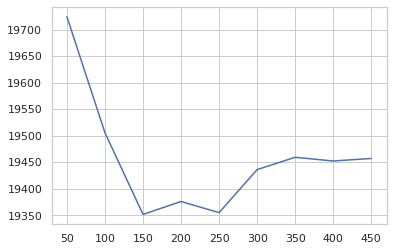

In [53]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# function for comparing different approaches
def get_score(n_estimators,learning_rate):
  preprocesser = ColumnTransformer(transformers=[('num',num_imputer,num_col),
                                               ('cat',cat_imputer,cat_col)])
  model = XGBRegressor(objective ='reg:squarederror',n_estimators=n_estimators,learning_rate=learning_rate)
  my_pipeline = Pipeline(steps=[('preprocessor', preprocesser),
                              ('model', model)])
  my_pipeline.fit(X_train, y_train)
  preds = my_pipeline.predict(X_valid)
  return mean_absolute_error(y_valid, preds)

results={}
for i in range(50,500,50):
  results[i]=get_score(n_estimators=i,learning_rate=0.5)
plt.plot(list(results.keys()),list(results.values()))

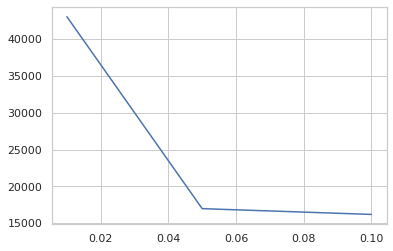

In [54]:
results={}
for i in [0.01,0.05,0.1]:
  results[i]=get_score(n_estimators=150,learning_rate=i)
plt.plot(list(results.keys()),list(results.values()))

In [55]:
preprocesser = ColumnTransformer(transformers=[('num',num_imputer,num_col),
                                               ('cat',cat_imputer,cat_col)])
model = XGBRegressor(objective ='reg:squarederror',n_estimators=150,learning_rate=0.05)
my_pipeline = Pipeline(steps=[('preprocessor', preprocesser),
                            ('model', model)])
my_pipeline.fit(X_train, y_train)
preds_test = my_pipeline.predict(X_test)
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

In [56]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


**FEATURE ENG**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import MEstimateEncoder
from sklearn.cluster import KMeans
import seaborn as sns

In [58]:
# Read the data
X = pd.read_csv('train.csv', index_col='Id') 
X_test = pd.read_csv('test.csv', index_col='Id')
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

In [59]:
#drop too many nulls-columns
high_cols = [col for col in X.columns if X[col].isnull().sum()>1200]
X = X.drop(X[high_cols],axis=1)

#fill remain nulls-columns
cat_impute = SimpleImputer(strategy='most_frequent')
num_impute = KNNImputer()

cat_col = [col for col in X.columns if X[col].dtype=='object']
num_col = [col for col in X.columns if X[col].dtype in ['int64','float64']]

X[cat_col] = cat_impute.fit_transform(X[cat_col])
X[num_col] = num_impute.fit_transform(X[num_col])

# X_test[cat_col] = num_impute.transform(X_test[cat_col])
# X_test[num_col] = num_impute.transform(X_test[num_col])

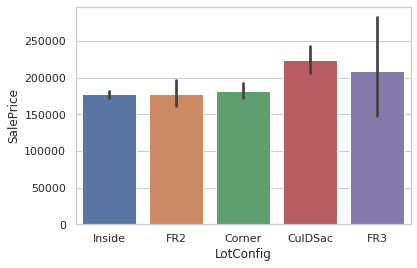

In [60]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=X.LotConfig, y=y, data=X)

In [61]:
df = pd.concat([X['LotConfig'],y],axis=1)
lotlist = ['CulDSac', 'FR3','FR2','Corner', 'Inside']
df['LotConfig'] = [list(reversed(lotlist)).index(i) for i in df['LotConfig']]

In [62]:
df.LotConfig.corr(df.SalePrice)

0.13447499402123908

In [63]:
# idex = [list(X.columns).index(i) for i in X[cat_col]]
# X_decoded = X.iloc[:,idex]
for colname in X.select_dtypes(["category", "object"]):
  X[colname], _ = X[colname].factorize()

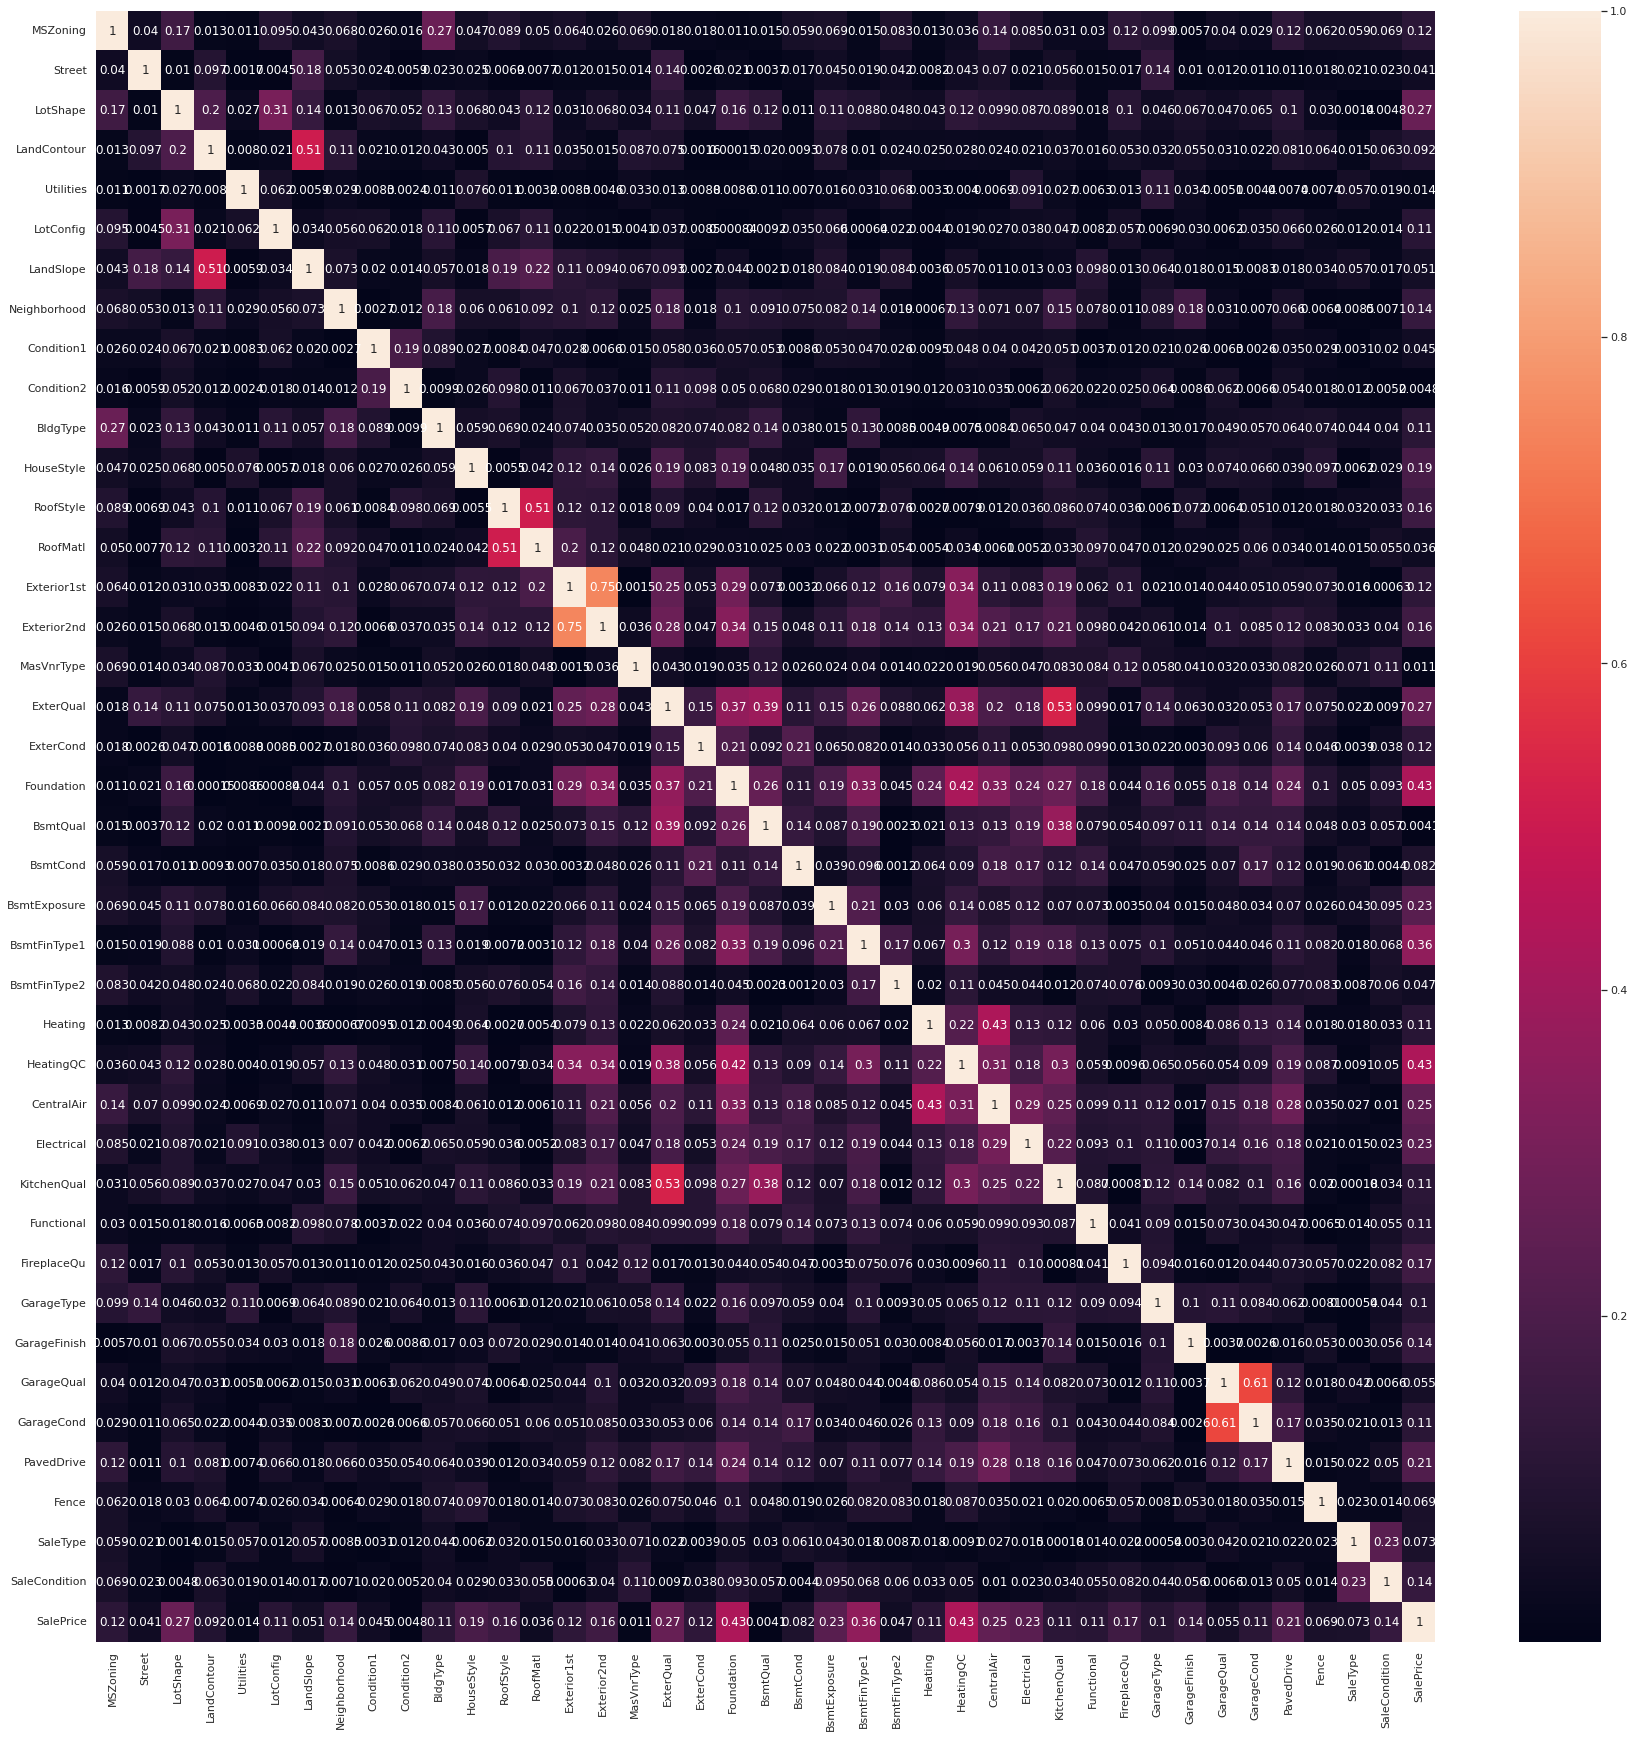

In [64]:
corr = pd.concat([X[cat_col],y],axis=1)
corr_mat = corr.corr().abs()
fig=plt.figure(figsize=(30,30))
sns.heatmap(corr_mat,annot=True)